In [1]:
!nvidia-smi

Mon Feb 20 20:53:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.7/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

  0%|          | 0.00/22.8M [00:00<?, ?B/s]

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs



  0%|          | 0.00/104k [00:00<?, ?B/s]

image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 22.1ms
Speed: 0.5ms pre-process, 22.1ms inference, 55.9ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="STFANq0CZgJkmONRAyDO")
project = rf.workspace("palmdetection-1cjxw").project("crack_detection_experiment")
dataset = project.version(5).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=64af196e5083106ee704345f6608e763c09ed75c5f61e5c9e2add25815762128
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Crack_detection_experiment-5 in yolov8:: 100%|██████████| 878/878 [00:00<00:00, 1354.64it/s]


In [11]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/datasets/Crack_detection_experiment-5/data.yaml epochs=10 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Crack_detection_experiment-5/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynam

In [12]:
!ls {HOME}/runs/segment/train3/

args.yaml					    results.png
BoxF1_curve.png					    train_batch0.jpg
BoxP_curve.png					    train_batch1.jpg
BoxPR_curve.png					    train_batch2.jpg
BoxR_curve.png					    val_batch0_labels.jpg
confusion_matrix.png				    val_batch0_pred.jpg
events.out.tfevents.1676926588.dfa256a75762.1003.0  val_batch1_labels.jpg
MaskF1_curve.png				    val_batch1_pred.jpg
MaskP_curve.png					    val_batch2_labels.jpg
MaskPR_curve.png				    val_batch2_pred.jpg
MaskR_curve.png					    weights
results.csv


/content


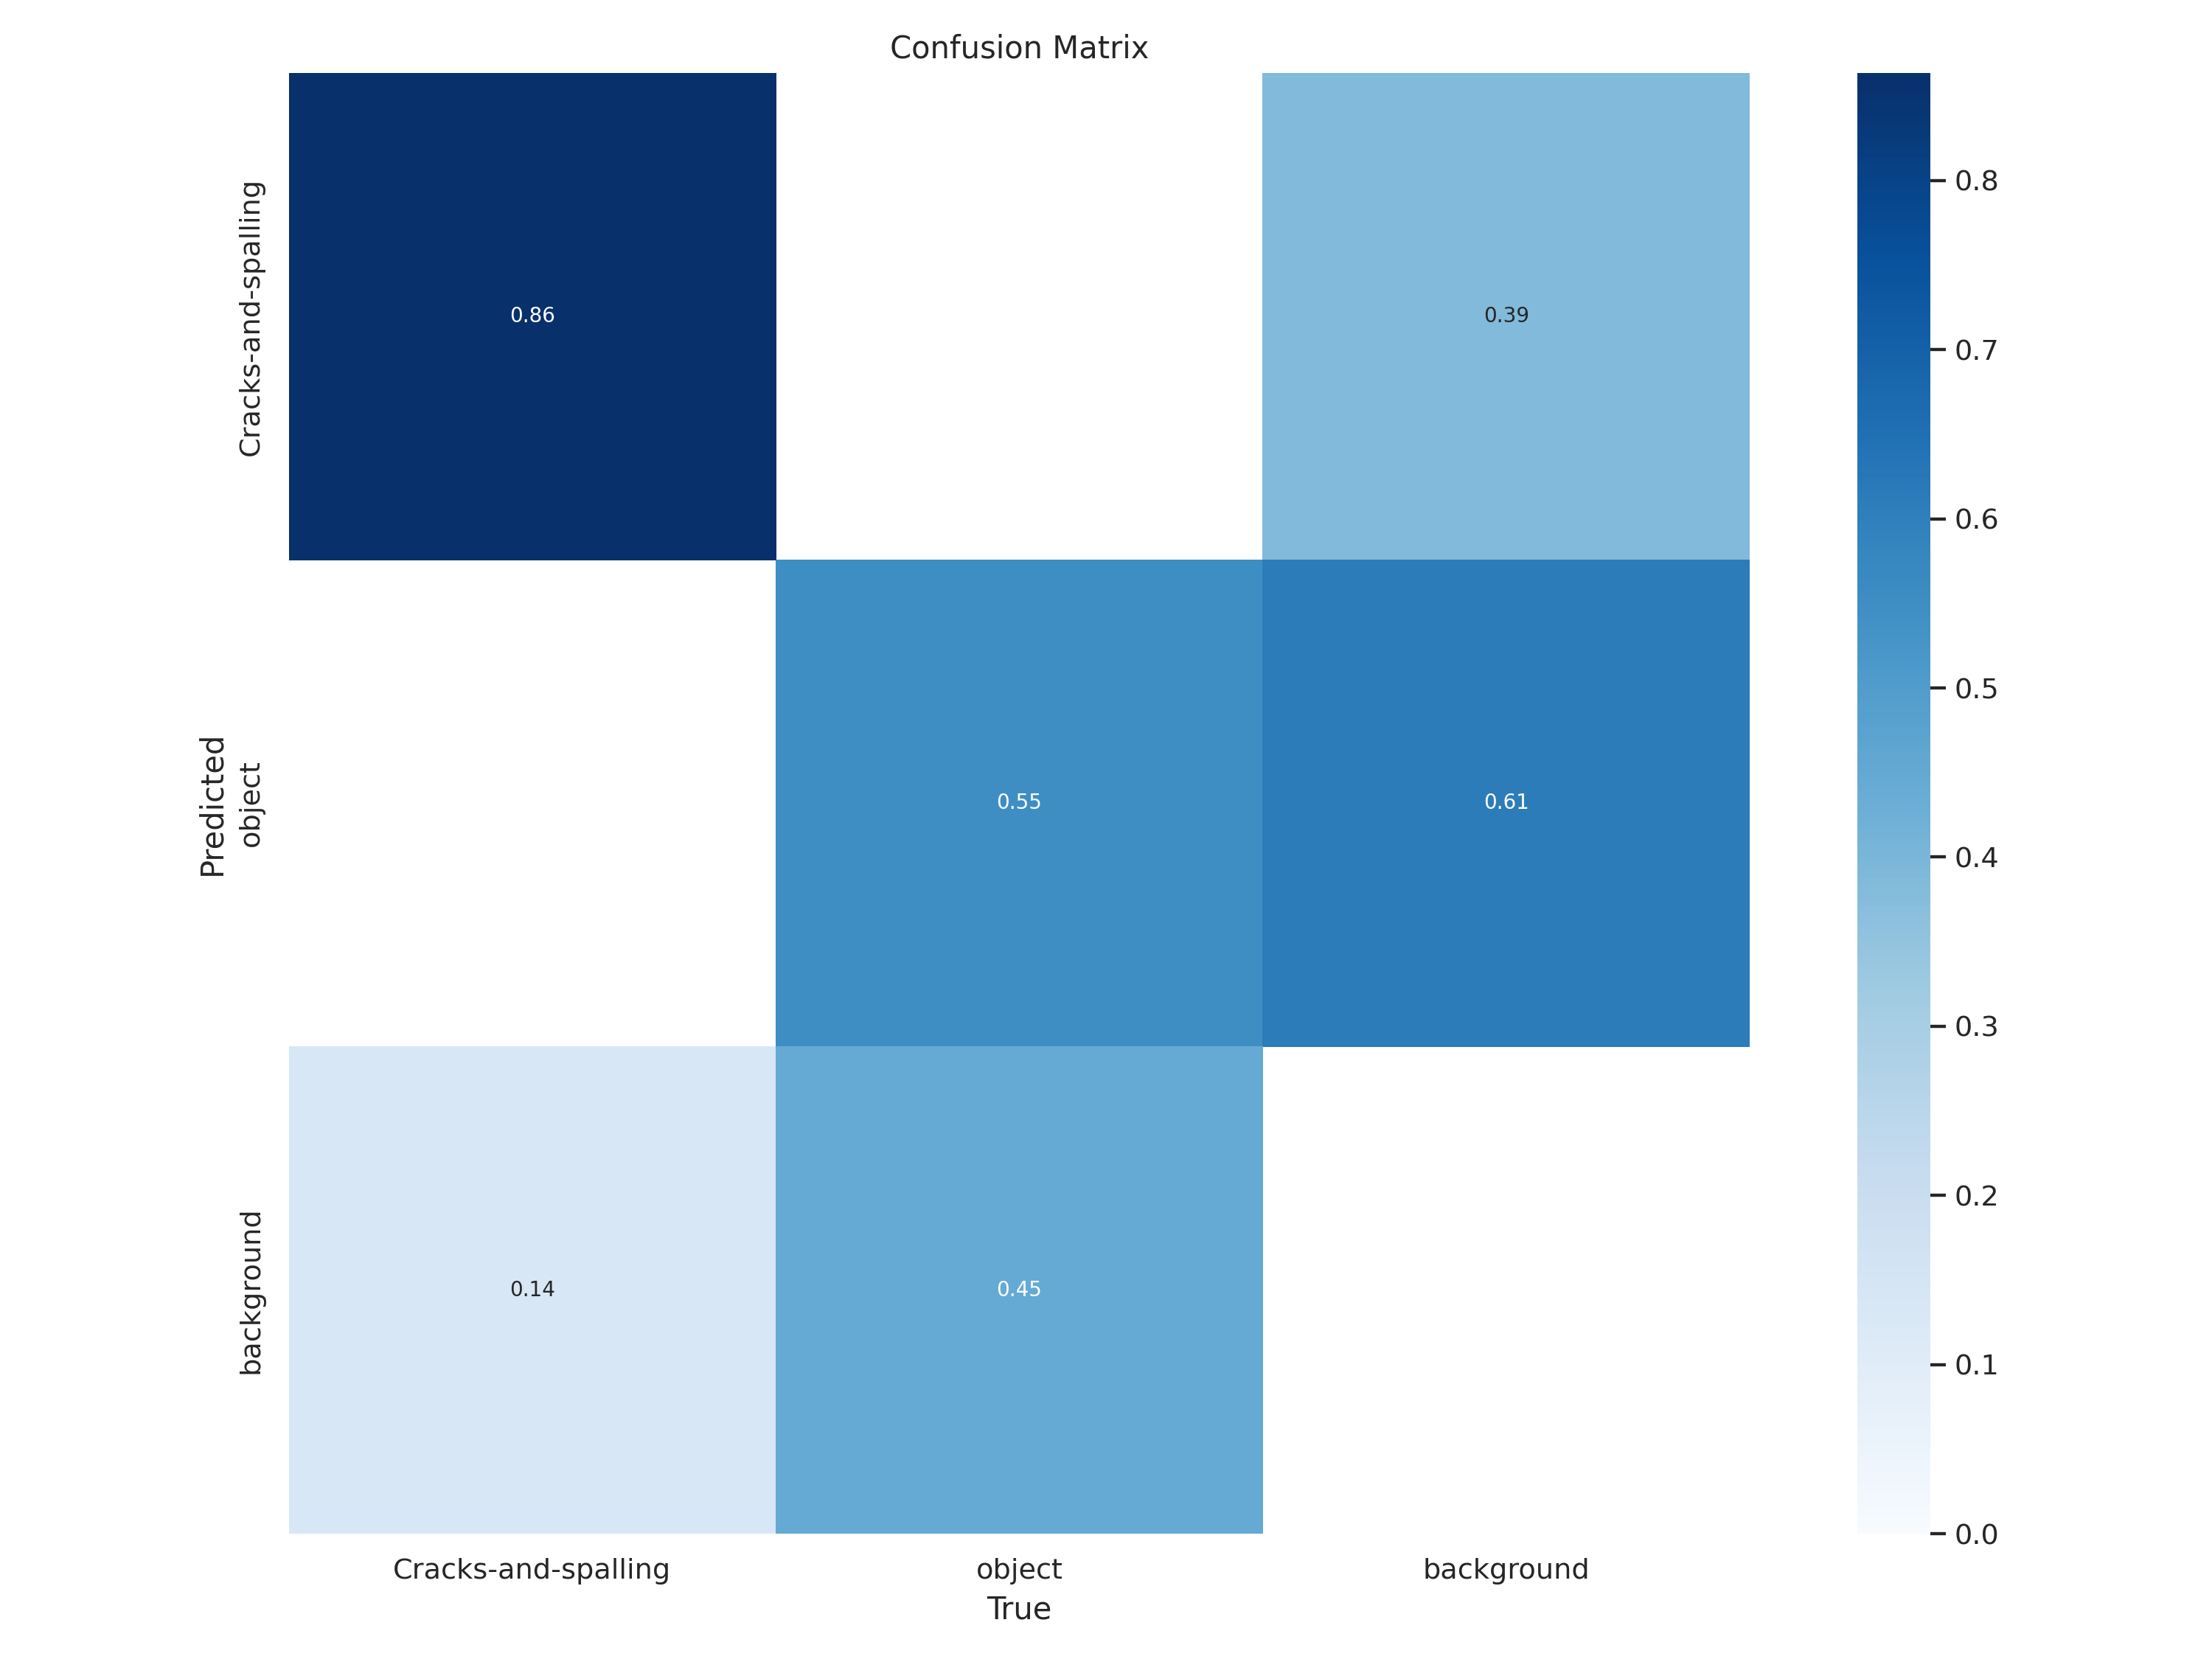

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/confusion_matrix.png', width=600)

/content


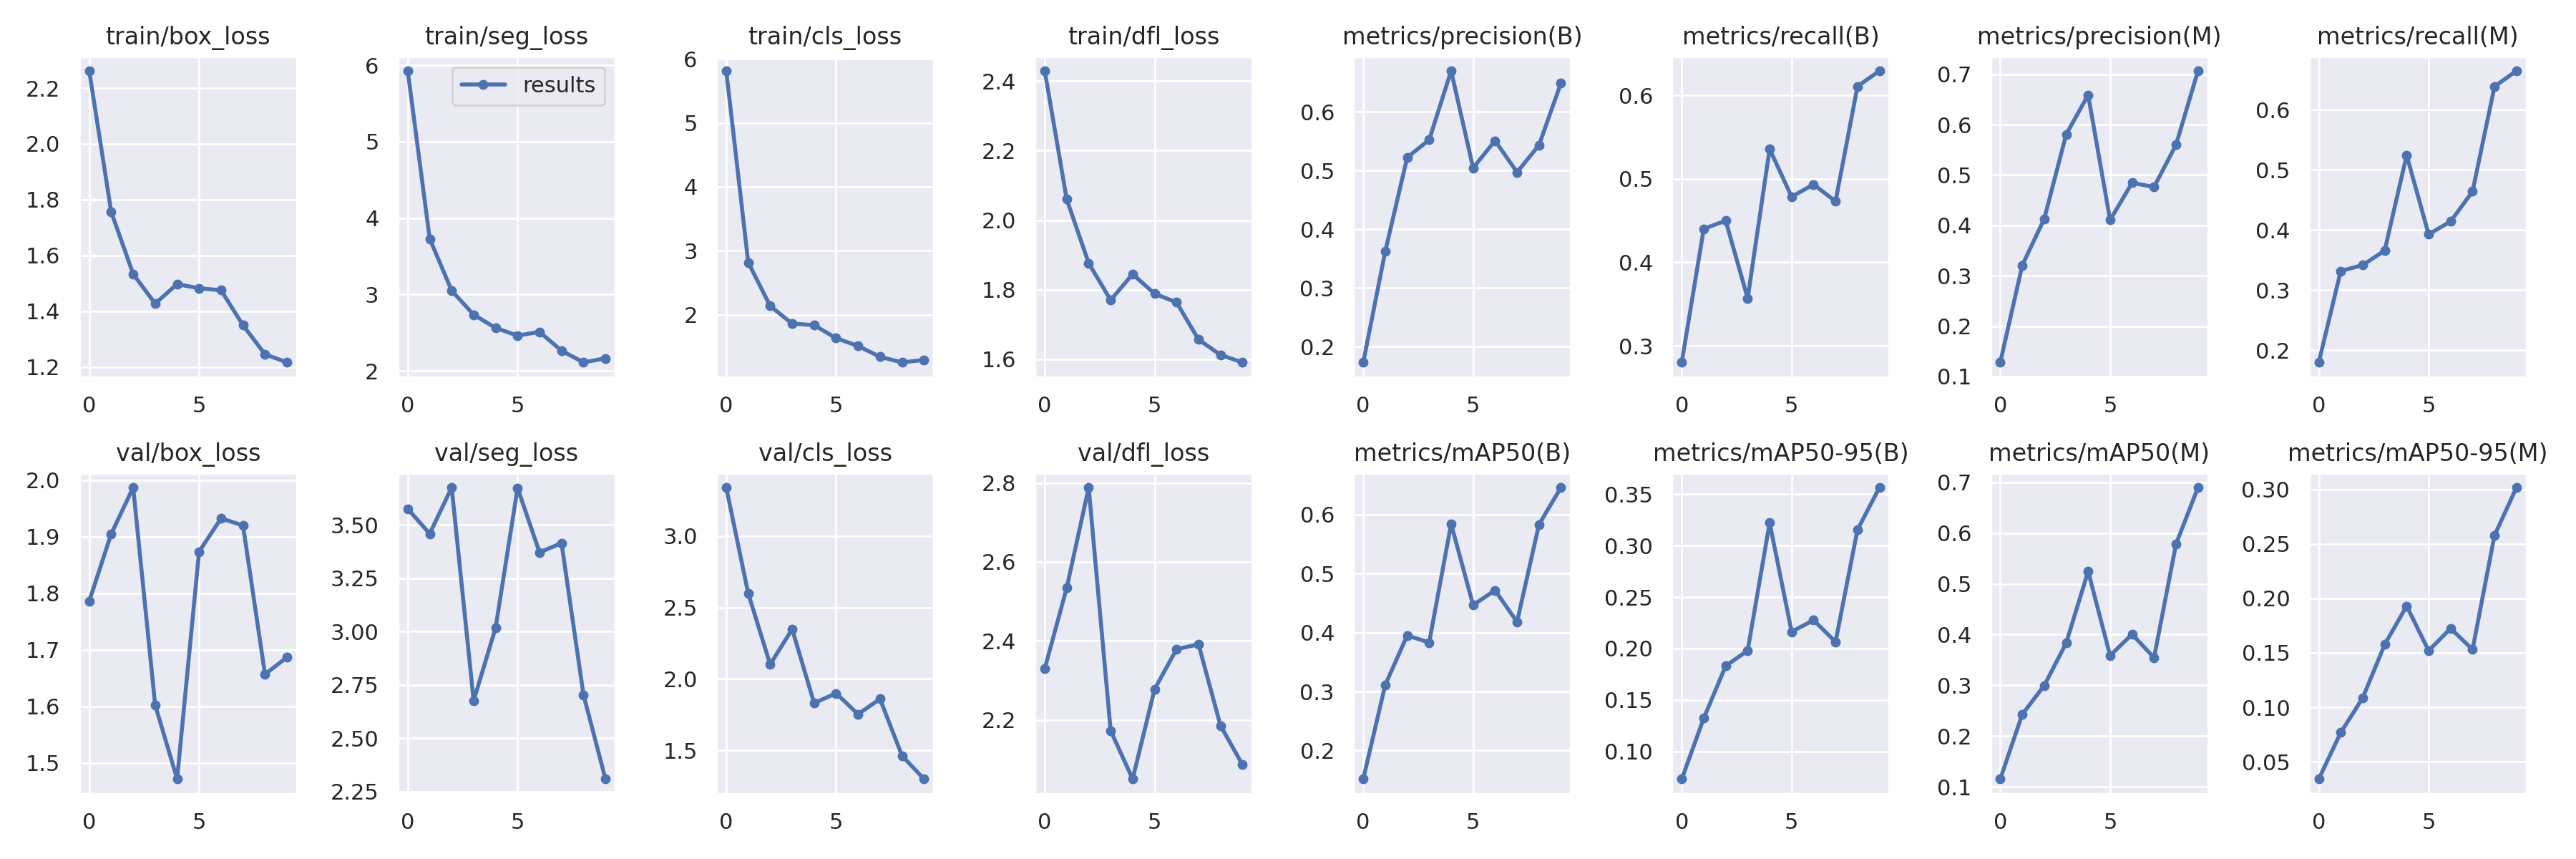

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/results.png', width=600)

/content


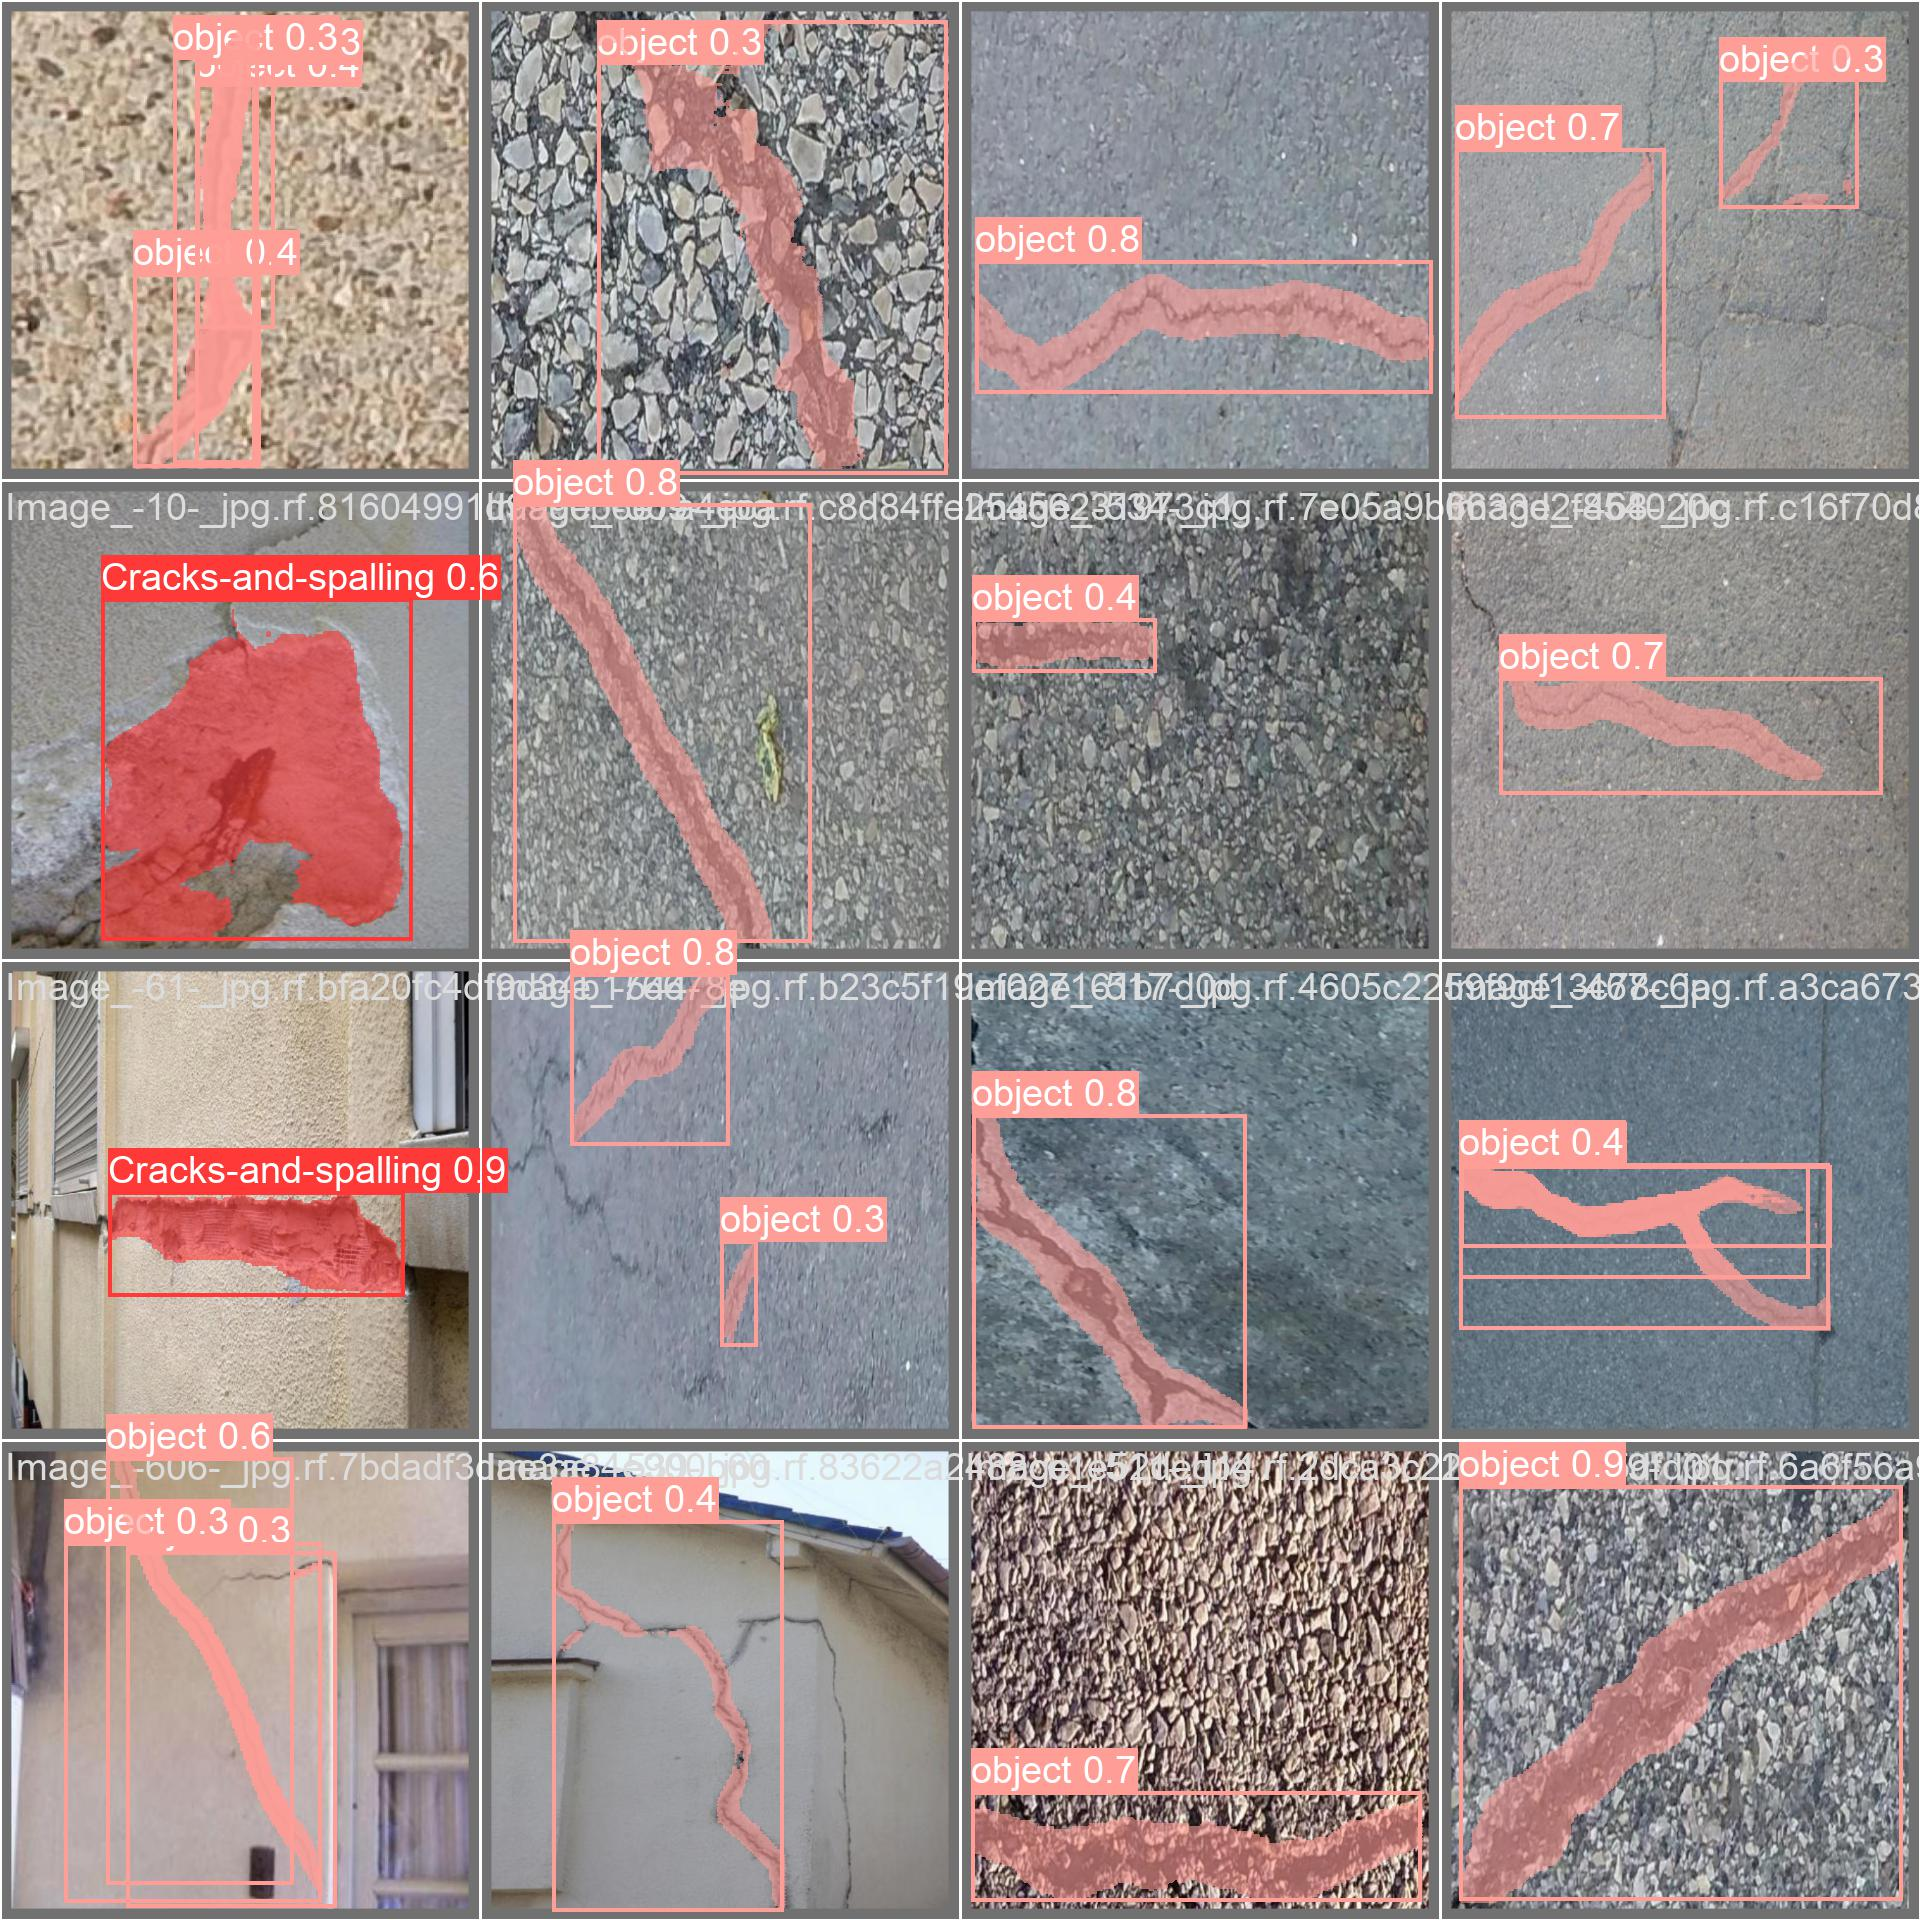

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [16]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train3/weights/best.pt data=/content/datasets/Crack_detection_experiment-5/data.yaml

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Crack_detection_experiment-5/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100% 73/73 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 5/5 [00:04<00:00,  1.03it/s]
                   all         73        102      0.656      0.628      0.647      0.354      0.715      0.665       0.69      0.302
   Cracks-and-spalling         73         44      0.699      0.791      0.776      0.435      0.768      0.864      0.865       0.44
                object         73         58      0.613      0.466      0.517      0.274      0.662      0.466      0.516      0.165
Speed: 3.2ms pre-process, 14.1ms inference, 0.0ms loss, 4.4ms post-process per image


In [17]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train3/weights/best.pt conf=0.25 source=/content/datasets/Crack_detection_experiment-5/test/images save=true

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/37 /content/datasets/Crack_detection_experiment-5/test/images/ApplicationFrameHost_T1gy54cAdW_png_jpg.rf.12d9eb8c6a7c3cfea188c182ac2902b9.jpg: 640x640 1 Cracks-and-spalling, 32.2ms
image 2/37 /content/datasets/Crack_detection_experiment-5/test/images/Betonrot_Hippodroom_jpg.rf.a1e7729c6e1d26235e42fbbe2e908cab.jpg: 640x640 1 Cracks-and-spalling, 33.2ms
image 3/37 /content/datasets/Crack_detection_experiment-5/test/images/Corrosion-hormigon-300x231_jpg.rf.2b6aaa4700d0afc620b2619dc0cd73ab.jpg: 640x640 2 Cracks-and-spallings, 32.6ms
image 4/37 /content/datasets/Crack_detection_experiment-5/test/images/Cracks-1901221128221_jpg.rf.aa0df7e8774e834376ba0809141119eb.jpg: 640x640 2 objects, 37.3ms
image 5/37 /content/datasets/Crack_detection_experiment-5/test/images/Danrae-Group-Concrete-Cancer-and-Spalling

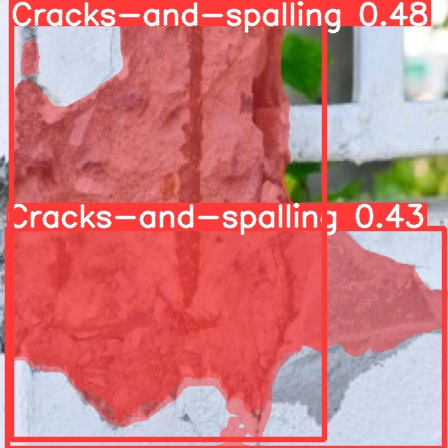

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/segment/predict/Corrosion-hormigon-300x231_jpg.rf.2b6aaa4700d0afc620b2619dc0cd73ab.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

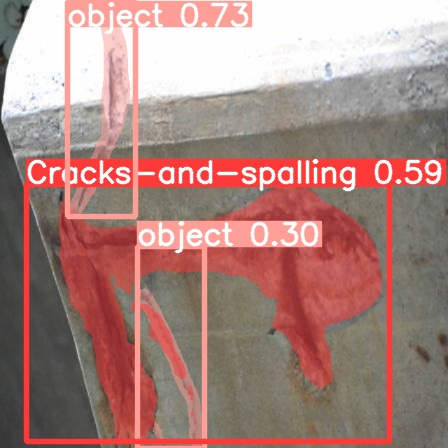

In [23]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/segment/predict/Qew_bruecke_nf_beton_kaputt_34_von_46_jpg.rf.89de1b2a674e00f5d15b98c02c7d5af9.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")